<a href="https://colab.research.google.com/github/anushreerajesh/Safe-View-AI-/blob/main/SafeviewAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download the dataset from Kaggle
path = kagglehub.dataset_download("mohamedmustafa/real-life-violence-situations-dataset")

# Print the path to the dataset files
print("Path to dataset files:", path)

In [ ]:
import os

# List the contents of the downloaded dataset folder
print("Dataset contents:", os.listdir(path))

# Walk through the dataset folder to inspect subdirectories and files
for root, dirs, files in os.walk(path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")

Dataset contents: ['real life violence situations', 'Real Life Violence Dataset']
Root: /kaggle/input/real-life-violence-situations-dataset
Directories: ['real life violence situations', 'Real Life Violence Dataset']
Files: []
Root: /kaggle/input/real-life-violence-situations-dataset/real life violence situations
Directories: ['Real Life Violence Dataset']
Files: []
Root: /kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset
Directories: ['NonViolence', 'Violence']
Files: []
Root: /kaggle/input/real-life-violence-situations-dataset/real life violence situations/Real Life Violence Dataset/NonViolence
Directories: []
Files: ['NV_759.mp4', 'NV_564.mp4', 'NV_126.mp4', 'NV_601.mp4', 'NV_397.mp4', 'NV_782.mp4', 'NV_143.mp4', 'NV_650.mp4', 'NV_639.mp4', 'NV_884.avi', 'NV_948.mp4', 'NV_743.mp4', 'NV_121.mp4', 'NV_218.mp4', 'NV_950.mp4', 'NV_110.mp4', 'NV_744.mp4', 'NV_398.mp4', 'NV_631.mp4', 'NV_832.mp4', 'NV_520.mp4', 'NV_323.mp4', 'NV_46

In [ ]:
import os

# Construct the correct paths using the downloaded dataset path
# Inspect the output of os.walk(path) to confirm the exact subdirectory structure
violence_dir = os.path.join(path, 'Real Life Violence Dataset', 'Violence')
non_violence_dir = os.path.join(path, 'Real Life Violence Dataset', 'NonViolence')

# List the files in the directories
violence_files = os.listdir(violence_dir)
non_violence_files = os.listdir(non_violence_dir)

print("Violent video files:", violence_files)
print("Non-Violent video files:", non_violence_files)

Violent video files: ['V_465.mp4', 'V_313.mp4', 'V_753.mp4', 'V_963.mp4', 'V_751.mp4', 'V_633.mp4', 'V_392.mp4', 'V_112.mp4', 'V_728.mp4', 'V_140.mp4', 'V_450.mp4', 'V_969.mp4', 'V_187.mp4', 'V_455.mp4', 'V_305.mp4', 'V_514.mp4', 'V_479.mp4', 'V_624.mp4', 'V_124.mp4', 'V_956.mp4', 'V_592.mp4', 'V_383.mp4', 'V_870.mp4', 'V_406.mp4', 'V_208.mp4', 'V_128.mp4', 'V_664.mp4', 'V_407.mp4', 'V_97.mp4', 'V_423.mp4', 'V_437.mp4', 'V_994.mp4', 'V_152.mp4', 'V_700.mp4', 'V_193.mp4', 'V_426.mp4', 'V_239.mp4', 'V_324.mp4', 'V_585.mp4', 'V_378.mp4', 'V_493.mp4', 'V_358.mp4', 'V_542.mp4', 'V_641.mp4', 'V_418.mp4', 'V_393.mp4', 'V_644.mp4', 'V_579.mp4', 'V_877.mp4', 'V_471.mp4', 'V_132.mp4', 'V_181.mp4', 'V_486.mp4', 'V_180.mp4', 'V_134.mp4', 'V_551.mp4', 'V_127.mp4', 'V_394.mp4', 'V_583.mp4', 'V_204.mp4', 'V_711.mp4', 'V_444.mp4', 'V_419.mp4', 'V_325.mp4', 'V_446.mp4', 'V_703.mp4', 'V_106.mp4', 'V_298.mp4', 'V_364.mp4', 'V_367.mp4', 'V_58.mp4', 'V_71.mp4', 'V_738.mp4', 'V_46.mp4', 'V_327.mp4', 'V_611.

In [ ]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Define directories for violent and non-violent videos
# Use the 'path' variable obtained from kagglehub.dataset_download()
# The correct subdirectory structure was determined in the previous cell
violent_dir = os.path.join(path, 'Real Life Violence Dataset', 'Violence')
non_violent_dir = os.path.join(path, 'Real Life Violence Dataset', 'NonViolence')


# Function to extract frames from a video
def extract_frames(video_path, frame_size=(8, 8)):  # Smaller frame size to reduce memory usage
    cap = cv2.VideoCapture(video_path)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)  # Resize to smaller dimensions
        frame = frame.astype('float32') / 255.0  # Normalize pixel values
        frames.append(frame)
    cap.release()
    return frames

# Initialize lists to store frames and labels
frames = []
labels = []

# Function to load frames from video files
def load_frames_from_directory(directory, label):
    global frames, labels
    for video_file in os.listdir(directory):
        video_path = os.path.join(directory, video_file)
        video_frames = extract_frames(video_path)
        frames.extend(video_frames)
        labels.extend([label] * len(video_frames))  # Assign label (0 or 1)

# Load frames from violent and non-violent directories
load_frames_from_directory(violent_dir, label=1)  # Label 1 for violence
load_frames_from_directory(non_violent_dir, label=0)  # Label 0 for non-violence

# Check the number of frames and labels
print(f"Total frames: {len(frames)}")
print(f"Total labels: {len(labels)}")

# Ensure that the number of frames and labels are consistent
assert len(frames) == len(labels), "Mismatch between number of frames and labels."

# Convert to numpy arrays and split into training and testing data
X = np.array(frames)
y = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Total frames: 287369
Total labels: 287369
Training data shape: (229895, 8, 8, 3)
Test data shape: (57474, 8, 8, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model (adjusted for small inputs like 8x8)
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(8, 8, 3)),  # Smaller input size
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save('violence_detection_model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7185/7185 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.7162 - loss: 0.5256 - val_accuracy: 0.8336 - val_loss: 0.3669
Epoch 2/10
7185/7185 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8453 - loss: 0.3479 - val_accuracy: 0.8562 - val_loss: 0.3194
Epoch 3/10
7185/7185 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.8756 - loss: 0.2899 - val_accuracy: 0.8809 - val_loss: 0.2772
Epoch 4/10
7185/7185 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.8916 - loss: 0.2585 - val_accuracy: 0.8993 - val_loss: 0.2442
Epoch 5/10
7185/7185 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.9056 - loss: 0.2297 - val_accuracy: 0.9111 - val_loss: 0.2203
Epoch 6/10
7185/7185 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9123 - loss: 0.2143 - val_accuracy: 0.9073 - val_loss: 0.2226
Epoch 7/10
7185/7185 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9195 - loss: 0.2018 - val_accuracy: 0.9201 - val_loss: 0.1988
Epoch 8/10
7185/7185 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9243 - loss: 0

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from IPython.display import display, Image
import io
from google.colab.patches import cv2_imshow

# Load the trained model
model = load_model('violence_detection_model.h5')

# Function to preprocess the frame
def preprocess_frame(frame):
    frame = cv2.resize(frame, (128, 128))
    frame = frame.astype('float32') / 255.0
    return np.expand_dims(frame, axis=0)

# Function to apply violence detection on video and display it
def detect_violence_in_video_display(video_path):
    cap = cv2.VideoCapture(video_path)
    # Check if the video file opened successfully
    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}")
        return
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess and predict
        input_frame = preprocess_frame(frame)
        prediction = model.predict(input_frame)[0][0]

        if prediction >= 0.5:  # If violence detected (prediction > 0.5)
            pink = np.full_like(frame, (180, 105, 255))  # Pink overlay
            frame = cv2.addWeighted(pink, 0.9, frame, 0.1, 0)

        # Display the processed frame in Colab
        cv2_imshow(frame)  # Show the current frame
        delay = int(1000 / fps) if fps > 0 else 1
        if cv2.waitKey(delay) & 0xFF == ord('q'): # Press 'q' to exit (might not work well in Colab)
             break

    cap.release()

# Apply the detection and display on your video
video_path = '/path/to/your/video.mp4'  # Replace with your video path
detect_violence_in_video_display(video_path)


Error: Could not open video file /path/to/your/video.mp4


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import files
import os

# Step 1: Upload a video
uploaded = files.upload()
video_path = list(uploaded.keys())[0]

# Step 2: Load your trained model (Make sure you have the model file 'violence_detection_model.h5')
model = load_model('violence_detection_model.h5')

# Step 3: Extract frames to predict
def extract_frames(video_path, max_frames=30, frame_size=(8, 8)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    count = 0
    while cap.isOpened() and count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)
        frame = frame.astype('float32') / 255.0
        frames.append(frame)
        count += 1
    cap.release()
    return np.array(frames)

frames = extract_frames(video_path)

# Step 4: Predict violence
if len(frames) == 0:
    print("❌ No frames extracted.")
else:
    preds = model.predict(frames)
    avg_pred = np.mean(preds)
    is_violent = avg_pred > 0.3

    if is_violent:
        print(f"⚠️ Violence Detected in '{video_path}'")
    else:
        print(f"✅ No Violence Detected in '{video_path}'")

    # Step 5: Create output video (with pink screen if violent)
    cap = cv2.VideoCapture(video_path)
    width, height = int(cap.get(3)), int(cap.get(4))
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out_path = '/content/output_violence_check.mp4'  # Save video in the correct Colab directory
    out = cv2.VideoWriter(out_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if is_violent:
            red_overlay = np.full_like(frame, (0, 0, 255))  # Pink color overlay
            frame = cv2.addWeighted(red_overlay, 0.9, frame, 0.1, 0)  # Apply overlay
        out.write(frame)

    cap.release()
    out.release()

    # Step 6: Automatically download the processed video
    print("✅ Processing complete. The video will now be downloaded automatically.")
    files.download(out_path)  # Automatically downloads the processed video


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

1797/1797 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy: 93.13%


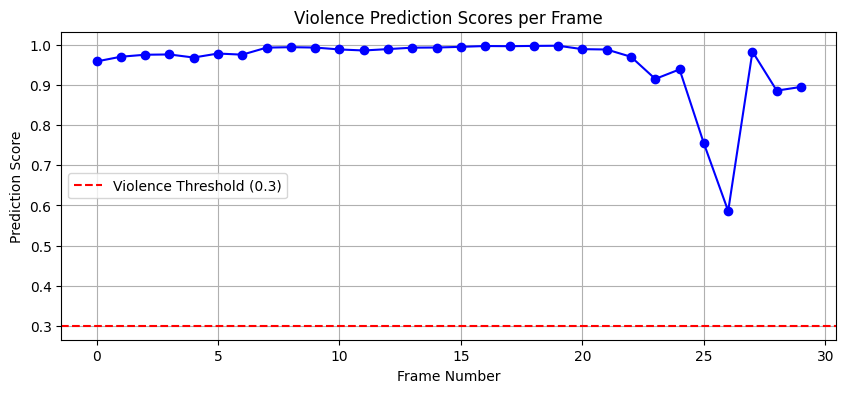

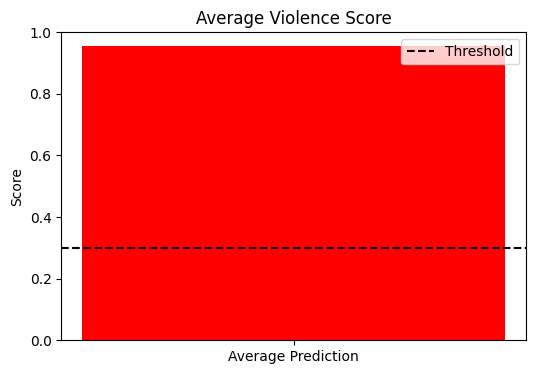

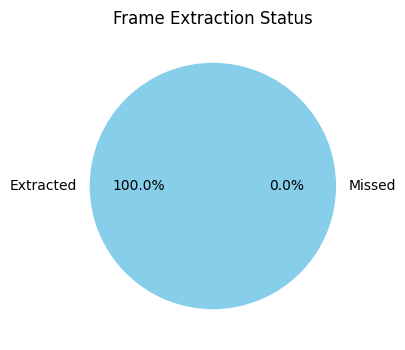

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Frame-by-frame prediction scores
plt.figure(figsize=(10, 4))
plt.plot(preds, marker='o', linestyle='-', color='blue')
plt.axhline(y=0.3, color='red', linestyle='--', label='Violence Threshold (0.3)')
plt.title('Violence Prediction Scores per Frame')
plt.xlabel('Frame Number')
plt.ylabel('Prediction Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Average Prediction
plt.figure(figsize=(6, 4))
plt.bar(['Average Prediction'], [avg_pred], color='green' if not is_violent else 'red')
plt.axhline(y=0.3, color='black', linestyle='--', label='Threshold')
plt.title('Average Violence Score')
plt.ylabel('Score')
plt.legend()
plt.ylim(0, 1)
plt.show()

# Plot 3: Frame count used
plt.figure(figsize=(4, 4))
plt.pie([len(frames), 30 - len(frames)], labels=['Extracted', 'Missed'], autopct='%1.1f%%', colors=['skyblue', 'lightgray'])
plt.title('Frame Extraction Status')
plt.show()


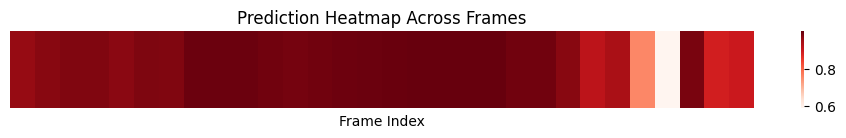

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 1))
sns.heatmap([preds.flatten()], cmap='Reds', cbar=True, xticklabels=False, yticklabels=False)
plt.title('Prediction Heatmap Across Frames')
plt.xlabel('Frame Index')
plt.show()


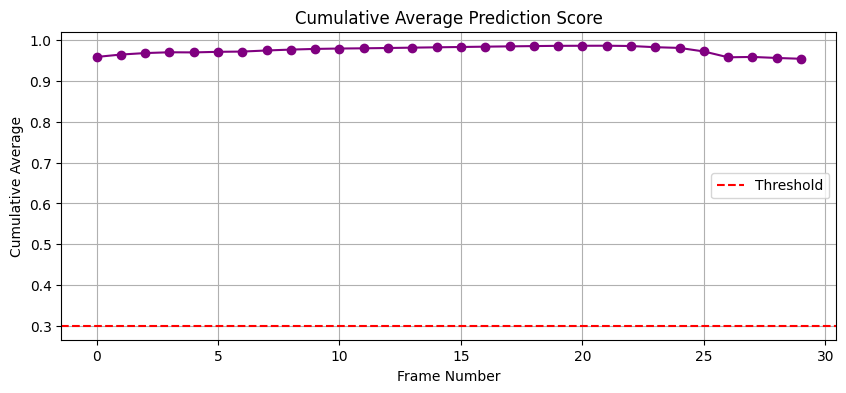

In [ ]:
cumulative_avg = [np.mean(preds[:i+1]) for i in range(len(preds))]

plt.figure(figsize=(10, 4))
plt.plot(cumulative_avg, color='purple', marker='o')
plt.axhline(y=0.3, color='red', linestyle='--', label='Threshold')
plt.title('Cumulative Average Prediction Score')
plt.xlabel('Frame Number')
plt.ylabel('Cumulative Average')
plt.legend()
plt.grid(True)
plt.show()


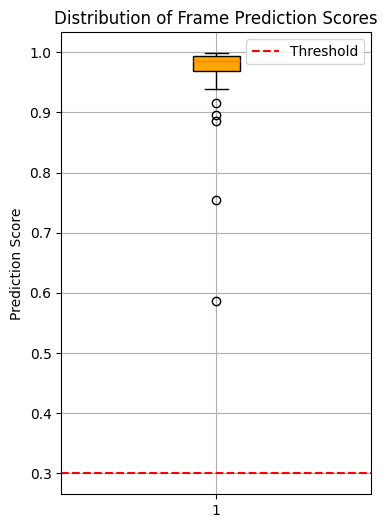

In [ ]:
plt.figure(figsize=(4, 6))
plt.boxplot(preds, vert=True, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.axhline(y=0.3, color='red', linestyle='--', label='Threshold')
plt.title('Distribution of Frame Prediction Scores')
plt.ylabel('Prediction Score')
plt.legend()
plt.grid(True)
plt.show()


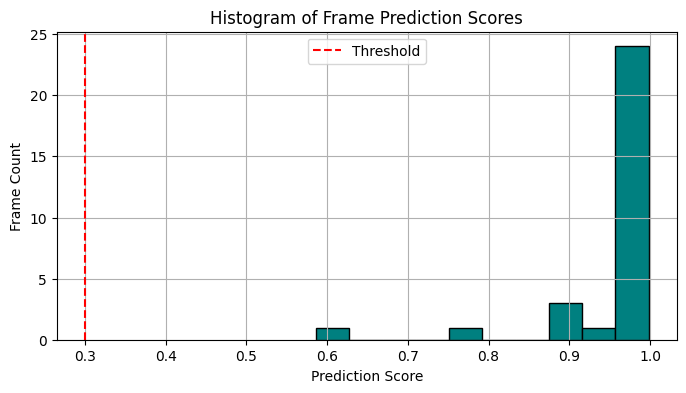

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(preds, bins=10, color='teal', edgecolor='black')
plt.axvline(x=0.3, color='red', linestyle='--', label='Threshold')
plt.title('Histogram of Frame Prediction Scores')
plt.xlabel('Prediction Score')
plt.ylabel('Frame Count')
plt.legend()
plt.grid(True)
plt.show()
